In [2]:
# Importazione del df e dei moduli necessari

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns
import datetime as dt
import scipy as sp

In [13]:
df = pd.read_csv("songs_normalize.csv")
df.sort_values(by="popularity", ascending=False)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,"rock, pop"
1311,Tom Odell,Another Love,244360,True,2013,88,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,pop
201,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop
1613,WILLOW,Wait a Minute!,196520,False,2015,86,0.764,0.705,3,-5.279,0,0.0278,0.03710,0.000019,0.0943,0.672,101.003,"pop, R&B, Dance/Electronic"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,Ariana Grande,Side To Side,226160,True,2016,0,0.648,0.738,6,-5.883,0,0.2470,0.04080,0.000000,0.2920,0.603,159.145,pop
217,Aaliyah,Rock The Boat,275026,False,2019,0,0.641,0.720,5,-5.209,1,0.0336,0.06880,0.002860,0.1930,0.418,92.988,"hip hop, pop, R&B"
1631,Tove Lo,Cool Girl,197815,True,2016,0,0.674,0.710,9,-7.042,0,0.1110,0.34300,0.000007,0.1290,0.234,101.983,"pop, Dance/Electronic"
1626,Cheat Codes,Sex,228361,False,2016,0,0.510,0.692,0,-5.825,1,0.1710,0.00451,0.000000,0.1380,0.209,102.420,"pop, Dance/Electronic"


In [6]:
# Tabella che riassume il numero di canzoni presenti nel dataframe per ogni anno

tpy = df.groupby("year", as_index=False)["song"].count()  # Tracks Per Year
tpy = tpy.rename(columns={"song":"n_tracks"})
display(tpy)

,year,n_tracks
0,1998,1
1,1999,38
2,2000,74
3,2001,108
4,2002,90
5,2003,97
6,2004,96
7,2005,104
8,2006,95
9,2007,94


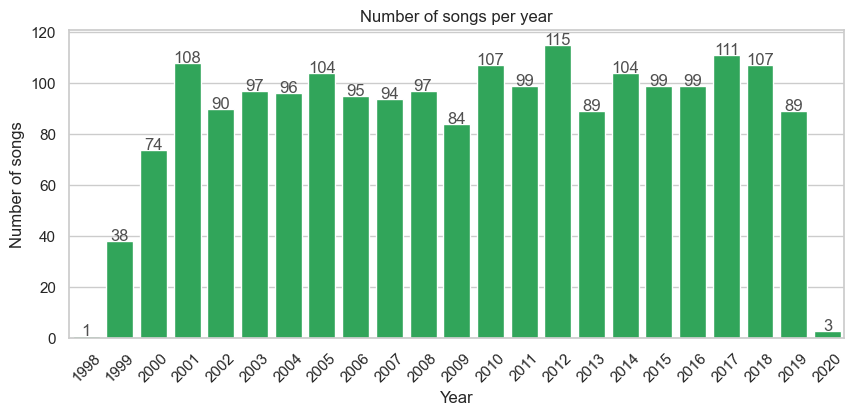

In [67]:
# Grafico distribuzione
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,4))
ax = sns.barplot(data=tpy, x="year", y="n_tracks", color="#1DB954")
ax.set(title="Number of songs per year", xlabel="Year", ylabel="Number of songs")

plt.xticks(rotation=45)

# Aggiungi le annotazioni per ogni barra
for index, row in tpy.iterrows():
    ax.text(row.name, row["n_tracks"], str(row["n_tracks"]), color='#505050', ha="center")

In [14]:
m = (tpy["year"] >= 2000) & (tpy["year"] <= 2019)
tpy[m]

,year,n_tracks
2,2000,74
3,2001,108
4,2002,90
5,2003,97
6,2004,96
7,2005,104
8,2006,95
9,2007,94
10,2008,97
11,2009,84


In [20]:
# Creazione del dataframe "mvpy": Mean Values Per Year

mvpy = df.groupby("year", as_index=False).aggregate( {"duration_ms" : "mean", 
                                                      "danceability" : "mean", 
                                                      "energy" : "mean", 
                                                      "valence": "mean",
                                                      "tempo" : "mean" } )

display(mvpy)

,year,duration_ms,danceability,energy,valence,tempo
0,1998,215466.000000,0.727000,0.445000,0.527000,81.125000
1,1999,253384.631579,0.668974,0.738421,0.574008,122.705000
2,2000,249993.067568,0.689824,0.748257,0.647973,112.927041
3,2001,242450.064815,0.674130,0.724631,0.661041,117.487074
4,2002,253549.077778,0.675244,0.722567,0.575156,113.280911
5,2003,236334.639175,0.664876,0.701485,0.607632,119.081402
6,2004,234039.843750,0.696833,0.734698,0.608881,114.768479
7,2005,236514.288462,0.672923,0.701048,0.553077,118.745683
8,2006,238148.400000,0.660863,0.705347,0.601274,114.581337
9,2007,231749.904255,0.630521,0.767149,0.559499,121.066968


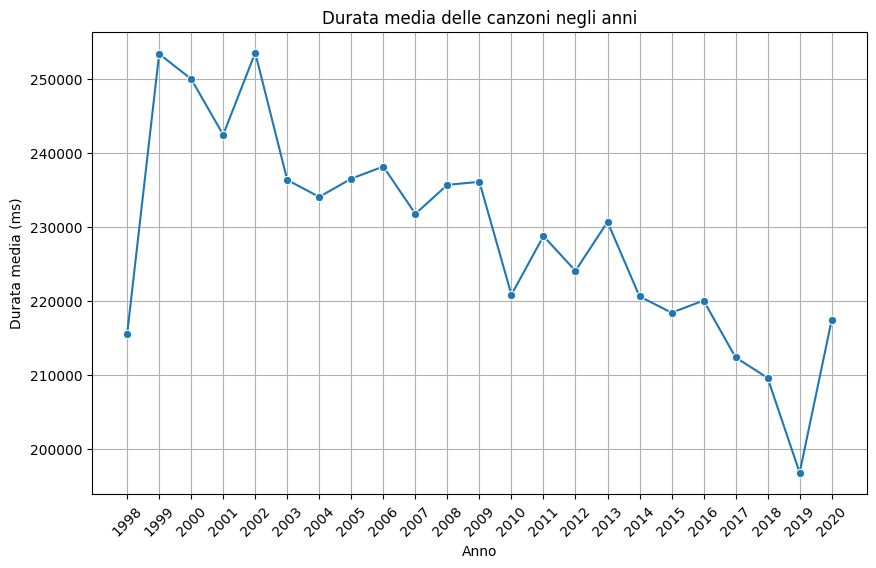

In [21]:
# Grafico dell'andamento della durata media delle canzoni negli anni
# Lineplot

plt.figure(figsize=(10,6))

plt.xticks(mvpy["year"], rotation=45)

plt.title('Durata media delle canzoni negli anni')
plt.xlabel('Anno')
plt.ylabel('Durata media (ms)')
plt.grid(True)

g = sns.lineplot(x='year', y='duration_ms', data=mvpy, marker='o')

plt.show()

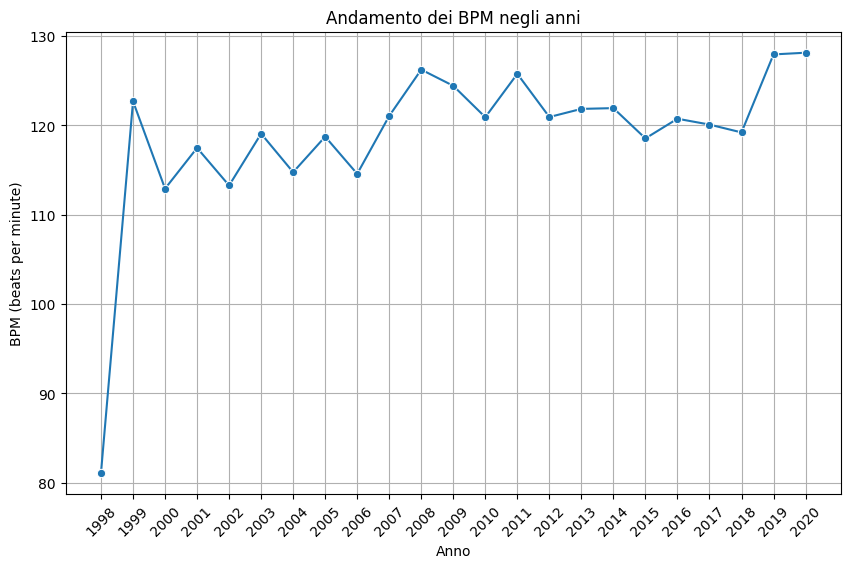

In [22]:
# Grafico dell'andamento dei BPM negli anni

plt.figure(figsize=(10,6))

plt.xticks(mvpy["year"], rotation=45)

plt.title('Andamento dei BPM negli anni')
plt.xlabel('Anno')
plt.ylabel('BPM (beats per minute)')
plt.grid(True)

g = sns.lineplot(x='year', y='tempo', data=mvpy, marker='o')

plt.show()

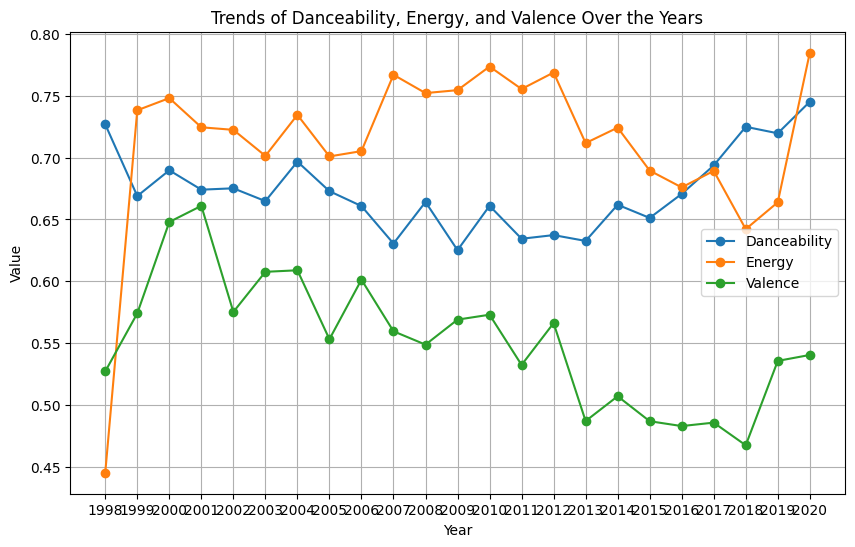

In [23]:
plt.figure(figsize=(10, 6))

plt.plot(mvpy['year'], mvpy['danceability'], label='Danceability', marker='o')
plt.plot(mvpy['year'], mvpy['energy'], label='Energy', marker='o')
plt.plot(mvpy['year'], mvpy['valence'], label='Valence', marker='o')

plt.xlabel('Year')
plt.xticks(mvpy["year"])
plt.ylabel('Value')
plt.title('Trends of Danceability, Energy, and Valence Over the Years')
plt.legend()
plt.grid(True)

plt.show()

## Correlazioni su MVPY

In [31]:
# Calcolo coefficiente di correlazione di Pearson tra Energy e Valence
corr_pearson = sp.stats.pearsonr(mvpy["energy"], mvpy["valence"])
print(f"{corr_pearson[0]}  |  {corr_pearson[1]}")

# Calcolo coefficiente di correlazione di Spearman tra Energy e Valence
corr_spearman = sp.stats.spearmanr(mvpy["energy"], mvpy["valence"])
print(f"{corr_spearman[0]}  |  {corr_spearman[1]}")

# Calcolo coefficiente di correlazione di Kendall tra Energy e Valence
corr_kendall = sp.stats.kendalltau(mvpy["energy"], mvpy["valence"])
print(f"{corr_kendall[0]}  |  {corr_kendall[1]}")

0.4897850038450753  |  0.028374329354058023
0.49022556390977434  |  0.02821080561889401
0.3684210526315789  |  0.02373449564495179


In [24]:
# Calcolo coefficiente di correlazione di Pearson tra Danceability e Valence
corr_pearson = sp.stats.pearsonr(mvpy["danceability"], mvpy["valence"])
print(f"{corr_pearson[0]}  |  {corr_pearson[1]}")

# Calcolo coefficiente di correlazione di Spearman tra Danceability e Valence
corr_spearman = sp.stats.spearmanr(mvpy["danceability"], mvpy["valence"])
print(f"{corr_spearman[0]}  |  {corr_spearman[1]}")

# Calcolo coefficiente di correlazione di Kendall tra Danceability e Valence
corr_kendall = sp.stats.kendalltau(mvpy["danceability"], mvpy["valence"])
print(f"{corr_kendall[0]}  |  {corr_kendall[1]}")

-0.02552849735652186  |  0.9149217758050956
0.03308270676691729  |  0.889875964885619
0.031578947368421054  |  0.8728414598639421


In [29]:
# Calcolo coefficiente di correlazione di Pearson tra Energy e Danceability
corr_pearson = sp.stats.pearsonr(mvpy["danceability"], mvpy["energy"])
print(f"{corr_pearson[0]}  |  {corr_pearson[1]}")

# Calcolo coefficiente di correlazione di Spearman tra Danceability e Valence
corr_spearman = sp.stats.spearmanr(mvpy["danceability"], mvpy["energy"])
print(f"{corr_spearman[0]}  |  {corr_spearman[1]}")

# Calcolo coefficiente di correlazione di Kendall tra Danceability e Valence
corr_kendall = sp.stats.kendalltau(mvpy["danceability"], mvpy["energy"])
print(f"{corr_kendall[0]}  |  {corr_kendall[1]}")

-0.645077338260992  |  0.002132290727926346
-0.5639097744360902  |  0.009606971537576621
-0.38947368421052636  |  0.016406081268886954


## Correlazioni su DF

In [32]:
# Calcolo coefficiente di correlazione di Pearson tra Energy e Valence
corr_pearson = sp.stats.pearsonr(df["energy"], df["valence"])
print(f"{corr_pearson[0]}  |  {corr_pearson[1]}")

# Calcolo coefficiente di correlazione di Spearman tra Energy e Valence
corr_spearman = sp.stats.spearmanr(df["energy"], df["valence"])
print(f"{corr_spearman[0]}  |  {corr_spearman[1]}")

# Calcolo coefficiente di correlazione di Kendall tra Energy e Valence
corr_kendall = sp.stats.kendalltau(df["energy"], df["valence"])
print(f"{corr_kendall[0]}  |  {corr_kendall[1]}")

0.3344744311237128  |  1.7866738425856967e-53
0.306729048397586  |  7.838394543071102e-45
0.2073810903608  |  8.733967598524915e-44


In [33]:
# Calcolo coefficiente di correlazione di Pearson tra Danceability e Valence
corr_pearson = sp.stats.pearsonr(df["danceability"], df["valence"])
print(f"{corr_pearson[0]}  |  {corr_pearson[1]}")

# Calcolo coefficiente di correlazione di Spearman tra Danceability e Valence
corr_spearman = sp.stats.spearmanr(df["danceability"], df["valence"])
print(f"{corr_spearman[0]}  |  {corr_spearman[1]}")

# Calcolo coefficiente di correlazione di Kendall tra Danceability e Valence
corr_kendall = sp.stats.kendalltau(df["danceability"], df["valence"])
print(f"{corr_kendall[0]}  |  {corr_kendall[1]}")

0.4031776456320264  |  4.7836672472447074e-79
0.39979741776297056  |  1.2226397624426886e-77
0.27345933937588435  |  8.639644888132069e-75


In [1]:
# Calcolo coefficiente di correlazione di Pearson tra Energy e Danceability
corr_pearson = sp.stats.pearsonr(df["danceability"], df["energy"])
print(f"{corr_pearson[0]}  |  {corr_pearson[1]}")

# Calcolo coefficiente di correlazione di Spearman tra Danceability e Energy
corr_spearman = sp.stats.spearmanr(df["danceability"], df["energy"])
print(f"{corr_spearman[0]}  |  {corr_spearman[1]}")

# Calcolo coefficiente di correlazione di Kendall tra Danceability e Energy
corr_kendall = sp.stats.kendalltau(df["danceability"], df["energy"])
print(f"{corr_kendall[0]}  |  {corr_kendall[1]}")

NameError: name 'sp' is not defined